# Riddler Express 2022-04-08
https://fivethirtyeight.com/features/can-you-be-mediocre-enough-to-win/

*This week, both puzzles come courtesy of Ben Orlin, author of the newly released “Math Games with Bad Drawings.” In addition to its terrible drawings, the book includes several games that have appeared in this column, including Tax Collector and Racetrack. Ben’s Express puzzle relates to tic-tac-toe.*

*In tic-tac-toe, you can rate a square’s “real estate value” by how many possible three-in-a-rows pass through it. Thus, the center scores 4, the corners score 3 and the edges score 2.*

*A tic-tac-toe board with numbers in each cell. Reading left-to-right, top-to bottom, these are: 3, 2, 3, 2, 4, 2, 3, 2, 3. The 3 in the top right also shows the 3 ways to get 3 in a row using that corner.
That means the center is the “most valuable” real estate, while the edges are the “least valuable.”*

*Now, let’s try three-dimensional tic-tac-toe, played on a 3-by-3-by-3 board. Which positions are the most and least valuable, and how much are they worth?*

Before trying to solve this problem, let's begin by diagramming it.

Imagine we have a cube centered at the origin of the x-y-z plane with side lengths of 2 units and playable positions on coordinates {x, y, z | x, y, z ∈ ℤ}. More succinctly, these coordinates are equivalent to the set of 3³ = 27 permutations of {-1, 0, 1} with replacement.

Let's write some code to find those coordinates.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
coordinates = []

#Wow! A rare (properly used) triple-nested for loop!
for x in range(-1, 2):
    for y in range(-1, 2):
        for z in range(-1, 2):
            print((x, y, z))
            coordinates.append(np.array([[x], [y], [z]]))


(-1, -1, -1)
(-1, -1, 0)
(-1, -1, 1)
(-1, 0, -1)
(-1, 0, 0)
(-1, 0, 1)
(-1, 1, -1)
(-1, 1, 0)
(-1, 1, 1)
(0, -1, -1)
(0, -1, 0)
(0, -1, 1)
(0, 0, -1)
(0, 0, 0)
(0, 0, 1)
(0, 1, -1)
(0, 1, 0)
(0, 1, 1)
(1, -1, -1)
(1, -1, 0)
(1, -1, 1)
(1, 0, -1)
(1, 0, 0)
(1, 0, 1)
(1, 1, -1)
(1, 1, 0)
(1, 1, 1)


Great! Now we have all our coordinates, so we should be able to plot them.

Except...

...That can’t be right. A screen only has width and height. Is there some way we could project these coordinates onto a two-dimensional plane?

Yes! That's why we have perspective projection. (For the uninitiated, I highly recommend <a href='https://youtu.be/PhxV_JrXeVk?t=1791'>Dr. Keenan Crane's explanation</a>.)

Let's write a function that takes in a three-dimensional array and returns a list [x, y] where x and y represent the coordinates after the projection.

In [3]:
def project(v, camera_position):
    v -= camera_position
    return np.ndarray.tolist((1 / v[2]) * v)[:2]

Now, plotting the projection is trivial. Let's see what the cube would look like from (-3, -3, -3). For clarity, I'll also plot the cube's edges.

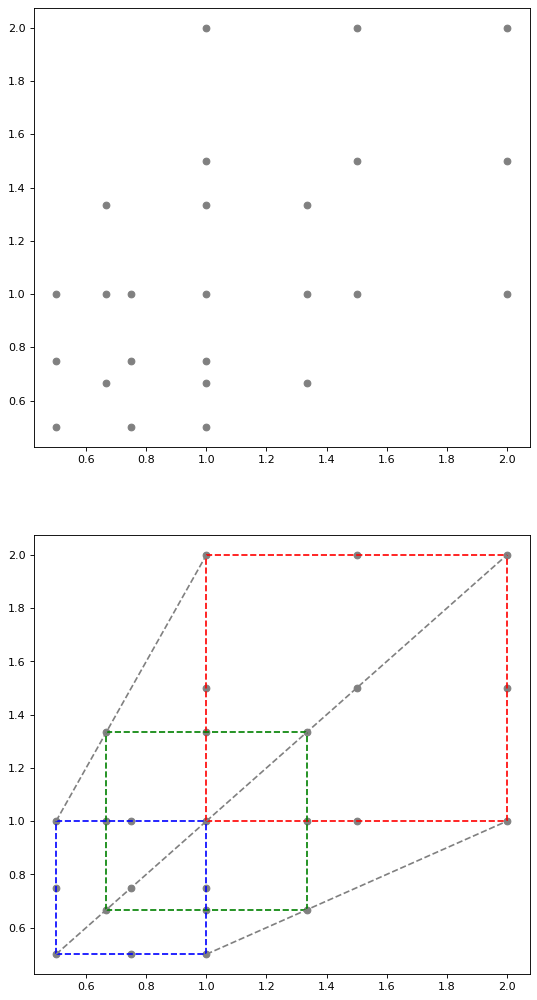

In [4]:
projected_coordinates = set([tuple(sum(project(c, np.array([[-3], [-3], [-3]])), [])) for c in coordinates])

x, y = zip(*projected_coordinates)

plt.figure(figsize=(8, 16), dpi=80)

plt.subplot(211)
plt.scatter(x, y, color="gray")

plt.subplot(212)
plt.scatter(x, y, color="gray")

plt.plot([1, 2], [2, 2], linestyle="--", color="red")
plt.plot([1, 2], [1, 1], linestyle="--", color="red")
plt.plot([2, 2], [1, 2], linestyle="--", color="red")
plt.plot([1, 1], [1, 2], linestyle="--", color="red")
plt.plot([2/3, 4/3], [4/3, 4/3], linestyle="--", color="green")
plt.plot([2/3, 4/3], [2/3, 2/3], linestyle="--", color="green")
plt.plot([4/3, 4/3], [2/3, 4/3], linestyle="--", color="green")
plt.plot([2/3, 2/3], [2/3, 4/3], linestyle="--", color="green")
plt.plot([1/2, 1], [1, 1], linestyle="--", color="blue")
plt.plot([1/2, 1], [1/2, 1/2], linestyle="--", color="blue")
plt.plot([1, 1], [1/2, 1], linestyle="--", color="blue")
plt.plot([1/2, 1/2], [1/2, 1], linestyle="--", color="blue")

plt.plot([1, 2], [1, 2], linestyle="--", color="gray")
plt.plot([1/2, 1], [1, 2], linestyle="--", color="gray")
plt.plot([1, 2], [1/2, 1], linestyle="--", color="gray")
plt.plot([1/2, 1], [1/2, 1], linestyle="--", color="gray")

plt.show()

Now that we can clearly envision the playing surface, we can return to the original problem. If we want to find to find the real estate value for each position, it makes sense to start by finding all the possible winning combinations.

Let's start with a list of all positions' coordinates in the x-y-z plane, this time in tuple form.

In [5]:
coordinates = []

for x in range(-1, 2):
    for y in range(-1, 2):
        for z in range(-1, 2):
            coordinates.append((x, y, z))

Now, we need to find all of the lines of length 3 passing through the cube. There are 2 primary types of lines: edges (for this purpose, edges refers to all of the dashed lines in the above figure) and diagonals.

Edges are relatively easy to find. Edges follow lines in the x, y, or z direction.

Diagonals can be more complicated. Diagonals follow lines in the x + y, x + z, or y + z direction.

Okay. Let's find all the edges and diagonals now.

In [6]:
lines = set([]) #Set of all possible winning three-in-a-row combinations

for c1 in coordinates:
    for i in range(3):
        #Line type 1 (edge): x, y, or z coordinate increases by 1
        c2 = c1[:i] + (c1[i]+1,) + c1[i+1:] 
        c3 = c1[:i] + (c1[i]+2,) + c1[i+1:]
        if c2 in coordinates and c3 in coordinates:
                lines.add((c1, c2, c3))

        #Line type 2 (diagonal): two of x, y, and z coordinates increase by 1
        c2 = tuple([c1[j] + (0 if j == i else 1) for j in range(3)])
        c3 = tuple([c1[j] + (0 if j == i else 2) for j in range(3)])
        if c2 in coordinates and c3 in coordinates:
                lines.add(tuple(sorted([c1, c2, c3])))

        #Line type 3 (diagonal): one of of x, y, and z coordinates increases by 1 and one decreases by 1
        for s in (-1, 1):
            c2 = ()
            for j in range(3):
                a = (0 if j == i else 1)
                c2 += (c1[j] + s*a,)
                s *= (1 if j == i else -1)
            c3 = ()
            for j in range(3):
                a = (0 if j == i else 2)
                c3 += (c1[j] + s*a,)
                s *= (1 if j == i else -1)
            if c2 in coordinates and c3 in coordinates:
                    lines.add(tuple(sorted([c1, c2, c3])))

#Line type 4 (diagonal): x, y, and z all change                    
lines.add(tuple(sorted([(-1, -1, -1), (0, 0, 0), (1, 1, 1)])))
lines.add(tuple(sorted([(-1, 1, -1), (0, 0, 0), (1, -1, 1)])))
lines.add(tuple(sorted([(1, -1, -1), (0, 0, 0), (-1, 1, 1)])))
lines.add(tuple(sorted([(1, 1, -1), (0, 0, 0), (-1, -1, 1)])))

Finally, let's sort each of the coordinates by the number of lines of which it is a part (i.e. its real estate value).

In [7]:
values = sorted([(c, len([line for line in lines if c in line])) for c in coordinates], key = lambda x: x[1])
print(pd.DataFrame({"Position": [value[0] for value in values], "Real Estate Value": [value[1] for value in values]}))

        Position  Real Estate Value
0    (-1, -1, 0)                  4
1    (-1, 0, -1)                  4
2     (-1, 0, 1)                  4
3     (-1, 1, 0)                  4
4    (0, -1, -1)                  4
5     (0, -1, 1)                  4
6     (0, 1, -1)                  4
7      (0, 1, 1)                  4
8     (1, -1, 0)                  4
9     (1, 0, -1)                  4
10     (1, 0, 1)                  4
11     (1, 1, 0)                  4
12    (-1, 0, 0)                  5
13    (0, -1, 0)                  5
14    (0, 0, -1)                  5
15     (0, 0, 1)                  5
16     (0, 1, 0)                  5
17     (1, 0, 0)                  5
18  (-1, -1, -1)                  7
19   (-1, -1, 1)                  7
20   (-1, 1, -1)                  7
21    (-1, 1, 1)                  7
22   (1, -1, -1)                  7
23    (1, -1, 1)                  7
24    (1, 1, -1)                  7
25     (1, 1, 1)                  7
26     (0, 0, 0)            

If we return to the cube, it becomes apparent that, like with the two-dimensional tic-tac-toe game, specific types of positions correspond to each real estate value.

<table>
    <tr>
        <th>Real Estate Value</th>
        <th>Position</th>
    </tr>
    <tr>
        <td>4</td>
        <td>center of edge</td>
    </tr>
    <tr>
        <td>5</td>
        <td>center of face</td>
    </tr>
    <tr>
        <td>7</td>
        <td>vertex</td>
    </tr>
    <tr>
        <td>13</td>
        <td>center</td>
    </tr>
</table>

Therefore, the most valuable position—with a real estate value of 13—is the center, and the least valuable positions—with real estate values of 4—are the centers of edges.